# <center>CHALLENGE 5<center>

<p>Team Name: Yu-Mex
<p>Student Names: Marco Figueroa, Slavko Slevic, Oluwaseun Doherty
<p>Student W#s: 0730286, 0724929, 0745589

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save <b>BEFORE</b> submitting. Then, submit this <b>saved</b> copy.

## Imports

In [7]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

## Loading Data

Read Data file to get vectors/points {V,U,R,Z,A,B,C,D,P,Q,S,T}:

In [10]:
data = pd.read_csv("../INPUT/Data.csv")
 
V = data.loc[data["VECTOR"] == "V", ["X1", "X2", "X3"]].values[0]
U = data.loc[data["VECTOR"] == "U", ["X1", "X2", "X3"]].values[0]
R = data.loc[data["VECTOR"] == "R", ["X1", "X2", "X3"]].values[0]
Z = data.loc[data["VECTOR"] == "Z", ["X1", "X2", "X3"]].values[0]
A = data.loc[data["VECTOR"] == "A", ["X1", "X2", "X3"]].values[0]
B = data.loc[data["VECTOR"] == "B", ["X1", "X2", "X3"]].values[0]
C = data.loc[data["VECTOR"] == "C", ["X1", "X2", "X3"]].values[0]
D = data.loc[data["VECTOR"] == "D", ["X1", "X2", "X3"]].values[0]
P = data.loc[data["VECTOR"] == "P", ["X1", "X2", "X3"]].values[0]
Q = data.loc[data["VECTOR"] == "Q", ["X1", "X2", "X3"]].values[0]
S = data.loc[data["VECTOR"] == "S", ["X1", "X2", "X3"]].values[0]
T = data.loc[data["VECTOR"] == "T", ["X1", "X2", "X3"]].values[0]

Vs = [V, U, R, Z, A, B, C, D, P, Q, S, T]
Vs

[array([8, 4, 0], dtype=int64),
 array([5, 7, 0], dtype=int64),
 array([ 4, -2,  0], dtype=int64),
 array([6, 2, 0], dtype=int64),
 array([ 2, -3,  0], dtype=int64),
 array([6, 4, 0], dtype=int64),
 array([-1,  5,  0], dtype=int64),
 array([ 4, -4,  0], dtype=int64),
 array([8, 4, 0], dtype=int64),
 array([2, 2, 0], dtype=int64),
 array([3, 5, 0], dtype=int64),
 array([6, 4, 5], dtype=int64)]

## Matrix and Vector Operations

Verify if true: [V.(U + R)].A = (V.U + V.R).A = V.[(U + R).A]:<br>
ans_1 = [V.(U + R)].A<br>
ans_2 = (V.U + V.R).A<br>
ans_3 = V.[(U + R).A]<br>

Note: The operator "." is defined as a "dot product" if it is for two vectors or as a "scalar multiplication" otherwise.

In [ ]:
#{[8 4 0] o ([5 7 0] + [4 -2 0])} * [2 -3 0]
#= {[8 4 0] o [9 5 0]} * [2 -3 0]
#= {8*9 + 4*5} * [2 -3 0]
#= 92 * [2 -3 0]
ans_1 = [184, -276, 0]

In [ ]:
#{[8 4 0]o[5 7 0] + [8 4 0]o[4 -2 0]} * [2 -3 0]
#= {68 + 24} * [2 -3 0]
#= 92 * [2 -3 0]
ans_2 = [184, -276, 0]

In [ ]:
#[8 4 0]*{([5 7 0] + [4 -2 0]) o [2 -3 0]}
#=[8 4 0] * {[9 5 0] o [2 -3 0]}
#=[8 4 0] * 3
ans_3 = [24, 12, 0]
#Not true for the 3rd answer

Write a function unitVec(Vs) to find unit vectors of the set Vs. Test your code to find unit vectors of U and V:

In [11]:
def unitVec(Vs):
    for vector in Vs:
        magnitude = math.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)
        
        u = [vector[0]/magnitude, vector[1]/magnitude, vector[2]/magnitude]
        
        print(u)
Vs1 = [U, V]
unitVec(Vs1)

[0.5812381937190965, 0.813733471206735, 0.0]
[0.8944271909999159, 0.4472135954999579, 0.0]


Write a function angleVec(Vs) to find the angle between two vectors of the set Vs. Test your code to find the angle between the unit vectors of U and V:

In [12]:
def angleVec(Vs):
    magnitudes = []
    for vector in Vs:
        magnitudes.append(math.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2))
    dot = Vs[0][0]*Vs[1][0] + Vs[0][1]*Vs[1][1] + Vs[0][2]*Vs[1][2]

    theta = math.acos(dot / (magnitudes[0]*magnitudes[1]))
    print(theta)
Vs2 = [U, V]
angleVec(Vs2)

0.4868992318112693


Write a function orthogon(Vs) to determine orthogonality of set of vectors Vs. Test your code using SV = {V, U, R, A, B}:

In [14]:
def orthogon(Vs):
    orth = []
    for i in range(len(Vs)):
        vector = []
        for j in range(len(Vs)):
            dot = Vs[i][0]*Vs[j][0] + Vs[i][1]*Vs[j][1] + Vs[i][2]*Vs[j][2]
            if i == j:
                vector.append("c") #itself
            elif dot == 0:
                vector.append("T") #orthogonal
            else:
                vector.append("n") #not orthogonal
        orth.append(vector)
    return orth 

SV = [V, U, R, A, B]
orthogonality = orthogon(SV)
orthogonality
#n - not orthogonal
#T - orthogonal
#c - current vector

[['c', 'n', 'n', 'n', 'n'],
 ['n', 'c', 'n', 'n', 'n'],
 ['n', 'n', 'c', 'n', 'n'],
 ['n', 'n', 'n', 'c', 'T'],
 ['n', 'n', 'n', 'T', 'c']]

Write a function plotVec(Vs) to plot vectors Vs in different colors:

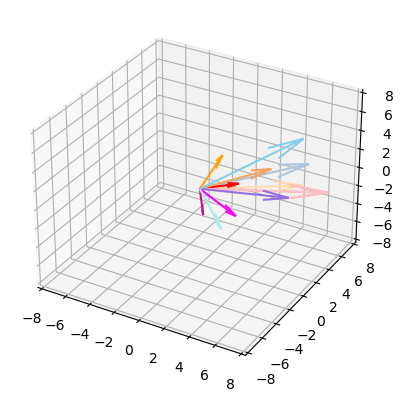

In [15]:
def plotVec(Vs):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    colors = list(mcolors.CSS4_COLORS.values())[75:150:5]
    
    for i, vector in enumerate(Vs):
        ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color=colors[i % len(colors)])
        
    maxx = np.max(np.abs(Vs)) #limit for each axis
    ax.set_xlim([-maxx, maxx])
    ax.set_ylim([-maxx, maxx])
    ax.set_zlim([-maxx, maxx])

plotVec(Vs)

Write a function projectVec(Vs) to find projection vector Vp of V1 on V2; Vs = (V1, V2). Test your code to find projection vector Zr of Z on R (component of Z in the direction of R):

In [16]:
def projectVec(Vs):
    dot = Vs[0][0]*Vs[1][0] + Vs[0][1]*Vs[1][1] + Vs[0][2]*Vs[1][2]
    magnitude2 = int((math.sqrt(Vs[1][0]**2 + Vs[1][1]**2 + Vs[1][2]**2))**2)
    
    ProjvU = [(dot / magnitude2) * Vs[1][0], (dot / magnitude2) * Vs[1][1], (dot / magnitude2) * Vs[1][2]]
    return ProjvU

Vs4 = [Z, R]
ProjrZ = projectVec(Vs4)
print(ProjrZ)

[4.0, -2.0, 0.0]


Plot Z, R, Zr in different colors using your function plotVec(Vs):

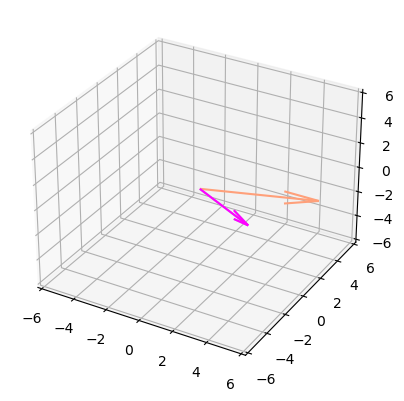

In [17]:
Vs5 = [Z, R, ProjrZ]
plotVec(Vs5) #the projection is the same as the vector R that's why it is not visible on the graph

Write a function linearDependence(Vs) to determine independence of a set Vs of vectors. Test your code using the set of vectors St = {V, U, R, A, B, C}:

In [27]:
def linearDependence(Vs):
    #all vectors in the data have 3 components
    #if we have more than 3 vectors in the set, then that set is linearly dependent
    if len(Vs) > 3: 
        print("The set is Linearly Dependent!")
    else:
        print("The set is Linearly Independent!")
    #checking if each vector is x=k*y, where k is a scalar, is too complicated 
    #as well as checking if a vector x = a*y + b*z, where a and b are scalars
    
    
St = [V, U, R, A, B, C]
linearDependence(St)

The set is Linearly Dependent!


Write a function lineEqn(Vs) to define the equation of the line which passes through two points Vs = {P0,P1} and to plot some points on the line. Test your code using the points D and C. Also, plot 10 successive points on this line using the parameter "t" 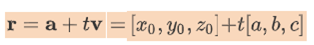:

Write a function distanceVec(Vs) to calculate the distance from a point P0 to a plane defined by three points {P1,P2,P3}; Vs = (P0,P1,P2,P3). Test your code using the set of points on the plane Plane = {P, Q, S} and the point T:

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://mljar.com/blog/matplotlib-colors/ #colors
https://kitchingroup.cheme.cmu.edu/blog/2013/03/01/Determining-linear-independence-of-a-set-of-vectors/ #linear dependence